In [57]:
# Travel Destination Recommendation System using User-Based Collaborative Filtering

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
print("🏛️ Travel Destination Recommendation System")
print("=" * 50)

🏛️ Travel Destination Recommendation System


In [60]:
# Sample travel destinations data from Maharashtra
destinations_data = {
    'name': [
        'Gateway of India, Mumbai',
        'Ajanta Caves, Aurangabad',
        'Ellora Caves, Aurangabad',
        'Lonavala Hill Station',
        'Mahabaleshwar',
        'Shaniwar Wada, Pune',
        'Elephanta Caves, Mumbai',
        'Shirdi Sai Baba Temple',
        'Raigad Fort',
        'Marine Drive, Mumbai',
        'Aga Khan Palace, Pune',
        'Sinhagad Fort, Pune',
        'Matheran Hill Station',
        'Panchgani Hill Station',
        'Kolhapur Mahalaxmi Temple',
        'Aurangabad Bibi Ka Maqbara',
        'Nashik Sula Vineyards',
        'Bhimashankar Temple',
        'Alibaug Beach',
        'Lavasa Hill City'
    ],
    'category': [
        'Historical Monument', 'UNESCO Heritage', 'UNESCO Heritage',
        'Hill Station', 'Hill Station', 'Historical Monument',
        'UNESCO Heritage', 'Religious Site', 'Historical Fort', 'Waterfront',
        'Historical Palace', 'Historical Fort', 'Hill Station',
        'Hill Station', 'Religious Site', 'Historical Monument',
        'Wine Tourism', 'Religious Site', 'Beach Resort', 'Modern Hill City'
    ],
    'city': [
        'Mumbai', 'Aurangabad', 'Aurangabad', 'Lonavala', 'Mahabaleshwar',
        'Pune', 'Mumbai', 'Shirdi', 'Raigad', 'Mumbai',
        'Pune', 'Pune', 'Matheran', 'Panchgani', 'Kolhapur',
        'Aurangabad', 'Nashik', 'Bhimashankar', 'Alibaug', 'Lavasa'
    ],
    'rating': [4.3, 4.6, 4.7, 4.2, 4.4, 4.1, 4.3, 4.5, 4.2, 4.4,
               4.0, 4.3, 4.5, 4.3, 4.4, 4.2, 4.1, 4.6, 4.0, 3.9]
}

In [61]:
# Create destinations DataFrame
destinations_df = pd.DataFrame(destinations_data)
print("📍 Maharashtra Travel Destinations:")
print(destinations_df[['name', 'category', 'city', 'rating']].head(10))

📍 Maharashtra Travel Destinations:
                       name             category           city  rating
0  Gateway of India, Mumbai  Historical Monument         Mumbai     4.3
1  Ajanta Caves, Aurangabad      UNESCO Heritage     Aurangabad     4.6
2  Ellora Caves, Aurangabad      UNESCO Heritage     Aurangabad     4.7
3     Lonavala Hill Station         Hill Station       Lonavala     4.2
4             Mahabaleshwar         Hill Station  Mahabaleshwar     4.4
5       Shaniwar Wada, Pune  Historical Monument           Pune     4.1
6   Elephanta Caves, Mumbai      UNESCO Heritage         Mumbai     4.3
7    Shirdi Sai Baba Temple       Religious Site         Shirdi     4.5
8               Raigad Fort      Historical Fort         Raigad     4.2
9      Marine Drive, Mumbai           Waterfront         Mumbai     4.4


In [62]:
# Create sample user-destination rating matrix
user_destination_ratings = {
    'Traveler_A': [5, 0, 0, 4, 3, 0, 4, 0, 0, 5, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0],
    'Traveler_B': [0, 5, 5, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
    'Traveler_C': [0, 0, 0, 5, 5, 0, 0, 0, 3, 0, 0, 0, 5, 4, 0, 0, 0, 0, 0, 4],
    'Traveler_D': [3, 0, 0, 0, 0, 4, 0, 5, 4, 0, 3, 4, 0, 0, 4, 0, 0, 5, 0, 0],
    'Traveler_E': [4, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 4, 0, 5, 0],
    'Traveler_F': [0, 4, 4, 0, 0, 5, 5, 0, 5, 0, 4, 5, 0, 0, 0, 3, 0, 0, 0, 0]
}

In [63]:
# Create rating matrix DataFrame
destination_names = destinations_df['name'].tolist()
ratings_df = pd.DataFrame(user_destination_ratings, index=destination_names)
ratings_matrix = ratings_df.T  # Users as rows, destinations as columns

print("\n🎯 User-Destination Rating Matrix:")
print(ratings_matrix.head())


🎯 User-Destination Rating Matrix:
            Gateway of India, Mumbai  Ajanta Caves, Aurangabad  \
Traveler_A                         5                         0   
Traveler_B                         0                         5   
Traveler_C                         0                         0   
Traveler_D                         3                         0   
Traveler_E                         4                         0   

            Ellora Caves, Aurangabad  Lonavala Hill Station  Mahabaleshwar  \
Traveler_A                         0                      4              3   
Traveler_B                         5                      0              0   
Traveler_C                         0                      5              5   
Traveler_D                         0                      0              0   
Traveler_E                         0                      3              0   

            Shaniwar Wada, Pune  Elephanta Caves, Mumbai  \
Traveler_A                    0        

In [64]:
# Function to calculate Pearson correlation between two users
def pearson_correlation(user1_ratings, user2_ratings):
    """Calculate Pearson correlation between two users"""
    # Find common rated items (non-zero ratings)
    user1_nonzero = user1_ratings > 0
    user2_nonzero = user2_ratings > 0
    common_items = user1_nonzero & user2_nonzero

    if common_items.sum() < 2:  # Need at least 2 common items
        return 0.0

    # Get ratings for common items
    u1_common = user1_ratings[common_items]
    u2_common = user2_ratings[common_items]

    # Calculate Pearson correlation
    correlation = np.corrcoef(u1_common, u2_common)[0, 1]

    # Handle NaN (when all ratings are the same)
    if np.isnan(correlation):
        return 0.0

    return correlation

In [65]:
# Compute user similarity matrix manually
print("\n📊 Computing User Similarities...")
users = list(ratings_matrix.index)
similarity_matrix = pd.DataFrame(index=users, columns=users, dtype=float)

for user1 in users:
    for user2 in users:
        if user1 == user2:
            similarity_matrix.loc[user1, user2] = 1.0
        else:
            user1_ratings = ratings_matrix.loc[user1]
            user2_ratings = ratings_matrix.loc[user2]
            similarity = pearson_correlation(user1_ratings, user2_ratings)
            similarity_matrix.loc[user1, user2] = similarity

print("\n👥 User Similarity Matrix (Pearson Correlation):")
print(similarity_matrix.round(3))


📊 Computing User Similarities...

👥 User Similarity Matrix (Pearson Correlation):
            Traveler_A  Traveler_B  Traveler_C  Traveler_D  Traveler_E  \
Traveler_A       1.000         0.0       0.577         0.0       0.866   
Traveler_B       0.000         1.0       0.000         0.0       0.000   
Traveler_C       0.577         0.0       1.000         0.0       0.000   
Traveler_D       0.000         0.0       0.000         1.0       0.000   
Traveler_E       0.866         0.0       0.000         0.0       1.000   
Traveler_F       0.000         0.0       0.000         1.0       0.000   

            Traveler_F  
Traveler_A         0.0  
Traveler_B         0.0  
Traveler_C         0.0  
Traveler_D         1.0  
Traveler_E         0.0  
Traveler_F         1.0  


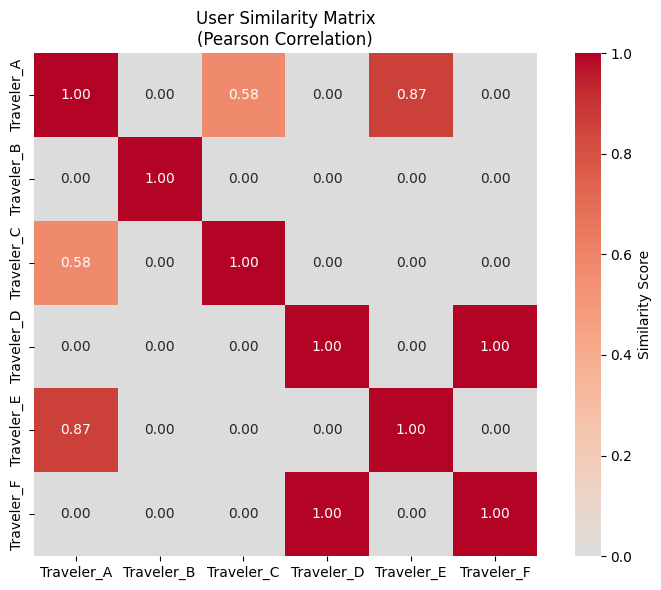

In [66]:
# Visualize similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix.astype(float), annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Similarity Score'})
plt.title('User Similarity Matrix\n(Pearson Correlation)')
plt.tight_layout()
plt.show()

In [67]:
# Function to find k-nearest neighbors
def get_k_nearest_neighbors(sim_matrix, user, k=2):
    """Find k most similar users to the given user"""
    user_similarities = sim_matrix.loc[user].drop(user)  # Remove self-similarity
    # Convert to numeric and sort
    user_similarities = pd.to_numeric(user_similarities, errors='coerce').fillna(0)
    return user_similarities.sort_values(ascending=False).head(k)

In [68]:
# Function to recommend destinations
def recommend_destinations(ratings, similarity_matrix, user, k=2, top_n=5):
    """Recommend destinations for a user based on similar users' preferences"""
    # Find k nearest neighbors
    neighbors = get_k_nearest_neighbors(similarity_matrix, user, k)

    if neighbors.empty or neighbors.max() <= 0:
        return pd.Series([], dtype=float)

    # Calculate weighted scores
    weighted_scores = pd.Series(0.0, index=ratings.columns)
    similarity_sum = 0

    for neighbor, sim_score in neighbors.items():
        if sim_score > 0:  # Only consider positively correlated users
            neighbor_ratings = ratings.loc[neighbor]
            weighted_scores += neighbor_ratings * sim_score
            similarity_sum += sim_score

    # Normalize by similarity sum
    if similarity_sum > 0:
        weighted_scores = weighted_scores / similarity_sum

    # Filter out already visited destinations (rated > 0)
    user_rated = ratings.loc[user]
    unvisited_destinations = weighted_scores[user_rated == 0]

    # Return top recommendations
    recommendations = unvisited_destinations.sort_values(ascending=False).head(top_n)
    return recommendations[recommendations > 0]  # Only positive scores

In [69]:
# Function to get destination details
def get_destination_details(destination_name, destinations_df):
    """Get details about a specific destination"""
    dest_info = destinations_df[destinations_df['name'] == destination_name]
    if not dest_info.empty:
        return dest_info.iloc[0]
    return None

In [70]:
# Function to display recommendations with details
def display_recommendations(user, recommendations, destinations_df):
    """Display recommendations with destination details"""
    print(f"\n🎯 Top Destination Recommendations for {user}:")
    print("=" * 60)

    if recommendations.empty:
        print("   No new recommendations available (user may have visited most destinations).")
        return

    for i, (destination, score) in enumerate(recommendations.items(), 1):
        dest_details = get_destination_details(destination, destinations_df)
        if dest_details is not None:
            print(f"{i}. {destination}")
            print(f"   📍 Location: {dest_details['city']}")
            print(f"   🏷️  Category: {dest_details['category']}")
            print(f"   ⭐ Rating: {dest_details['rating']}/5.0")
            print(f"   🎯 Recommendation Score: {score:.3f}")
            print()

In [71]:
# Generate recommendations for each user
print("\n🚀 Generating Destination Recommendations...")
print("=" * 50)

for user in users:
    # Find similar users
    neighbors = get_k_nearest_neighbors(similarity_matrix, user, k=2)
    print(f"\n👤 {user}:")
    if not neighbors.empty and neighbors.max() > 0:
        neighbor_names = [name for name, score in neighbors.items() if score > 0]
        neighbor_scores = [score for score in neighbors.values if score > 0]
        print(f"   Most similar travelers: {neighbor_names}")
        print(f"   Similarity scores: {[round(score, 3) for score in neighbor_scores]}")
    else:
        print("   No similar travelers found with positive correlation.")

    # Get recommendations
    recommendations = recommend_destinations(ratings_matrix, similarity_matrix, user, k=2, top_n=3)
    display_recommendations(user, recommendations, destinations_df)


🚀 Generating Destination Recommendations...

👤 Traveler_A:
   Most similar travelers: ['Traveler_E', 'Traveler_C']
   Similarity scores: [np.float64(0.866), np.float64(0.577)]

🎯 Top Destination Recommendations for Traveler_A:
1. Alibaug Beach
   📍 Location: Alibaug
   🏷️  Category: Beach Resort
   ⭐ Rating: 4.0/5.0
   🎯 Recommendation Score: 3.000

2. Nashik Sula Vineyards
   📍 Location: Nashik
   🏷️  Category: Wine Tourism
   ⭐ Rating: 4.1/5.0
   🎯 Recommendation Score: 2.400

3. Lavasa Hill City
   📍 Location: Lavasa
   🏷️  Category: Modern Hill City
   ⭐ Rating: 3.9/5.0
   🎯 Recommendation Score: 1.600


👤 Traveler_B:
   No similar travelers found with positive correlation.

🎯 Top Destination Recommendations for Traveler_B:
   No new recommendations available (user may have visited most destinations).

👤 Traveler_C:
   Most similar travelers: ['Traveler_A']
   Similarity scores: [np.float64(0.577)]

🎯 Top Destination Recommendations for Traveler_C:
1. Gateway of India, Mumbai
   📍

In [72]:
# Function to analyze user preferences
def analyze_user_preferences(user, ratings_matrix, destinations_df):
    """Analyze what types of destinations a user prefers"""
    user_ratings = ratings_matrix.loc[user]
    visited_destinations = user_ratings[user_ratings > 0]

    if visited_destinations.empty:
        return "No destinations rated yet."

    # Get categories of visited destinations
    visited_names = visited_destinations.index
    categories = []
    cities = []

    for dest_name in visited_names:
        dest_info = destinations_df[destinations_df['name'] == dest_name]
        if not dest_info.empty:
            categories.append(dest_info.iloc[0]['category'])
            cities.append(dest_info.iloc[0]['city'])

    # Count preferences
    category_counts = pd.Series(categories).value_counts()
    city_counts = pd.Series(cities).value_counts()

    return {
        'preferred_categories': category_counts,
        'preferred_cities': city_counts,
        'average_rating': visited_destinations.mean(),
        'total_visited': len(visited_destinations)
    }

In [73]:
# Analyze preferences for each user
print("\n📈 User Preference Analysis:")
print("=" * 40)

for user in users:
    preferences = analyze_user_preferences(user, ratings_matrix, destinations_df)
    print(f"\n👤 {user}:")
    if isinstance(preferences, dict):
        print(f"   Destinations visited: {preferences['total_visited']}")
        print(f"   Average rating given: {preferences['average_rating']:.1f}/5.0")
        print(f"   Preferred categories: {dict(preferences['preferred_categories'])}")
        print(f"   Preferred cities: {dict(preferences['preferred_cities'])}")


📈 User Preference Analysis:

👤 Traveler_A:
   Destinations visited: 7
   Average rating given: 4.0/5.0
   Preferred categories: {'Hill Station': np.int64(4), 'Historical Monument': np.int64(1), 'UNESCO Heritage': np.int64(1), 'Waterfront': np.int64(1)}
   Preferred cities: {'Mumbai': np.int64(3), 'Lonavala': np.int64(1), 'Mahabaleshwar': np.int64(1), 'Matheran': np.int64(1), 'Panchgani': np.int64(1)}

👤 Traveler_B:
   Destinations visited: 4
   Average rating given: 4.5/5.0
   Preferred categories: {'UNESCO Heritage': np.int64(3), 'Historical Monument': np.int64(1)}
   Preferred cities: {'Aurangabad': np.int64(3), 'Mumbai': np.int64(1)}

👤 Traveler_C:
   Destinations visited: 6
   Average rating given: 4.3/5.0
   Preferred categories: {'Hill Station': np.int64(4), 'Historical Fort': np.int64(1), 'Modern Hill City': np.int64(1)}
   Preferred cities: {'Lonavala': np.int64(1), 'Mahabaleshwar': np.int64(1), 'Raigad': np.int64(1), 'Matheran': np.int64(1), 'Panchgani': np.int64(1), 'Lavasa'

In [74]:
# Function to recommend destinations by category
def recommend_by_category(category, destinations_df, top_n=5):
    """Recommend top destinations by category"""
    category_destinations = destinations_df[destinations_df['category'] == category]
    return category_destinations.nlargest(top_n, 'rating')[['name', 'city', 'rating']]

print("\n🏷️ Top Destinations by Category:")
print("=" * 35)

categories = destinations_df['category'].unique()
for category in categories:
    print(f"\n📍 {category}:")
    top_destinations = recommend_by_category(category, destinations_df, top_n=3)
    for _, dest in top_destinations.iterrows():
        print(f"   • {dest['name']} - {dest['city']} (⭐ {dest['rating']})")

print("\n✅ Travel Destination Recommendation System Complete!")
print("🎯 This system helps travelers discover new destinations based on similar users' preferences.")


🏷️ Top Destinations by Category:

📍 Historical Monument:
   • Gateway of India, Mumbai - Mumbai (⭐ 4.3)
   • Aurangabad Bibi Ka Maqbara - Aurangabad (⭐ 4.2)
   • Shaniwar Wada, Pune - Pune (⭐ 4.1)

📍 UNESCO Heritage:
   • Ellora Caves, Aurangabad - Aurangabad (⭐ 4.7)
   • Ajanta Caves, Aurangabad - Aurangabad (⭐ 4.6)
   • Elephanta Caves, Mumbai - Mumbai (⭐ 4.3)

📍 Hill Station:
   • Matheran Hill Station - Matheran (⭐ 4.5)
   • Mahabaleshwar - Mahabaleshwar (⭐ 4.4)
   • Panchgani Hill Station - Panchgani (⭐ 4.3)

📍 Religious Site:
   • Bhimashankar Temple - Bhimashankar (⭐ 4.6)
   • Shirdi Sai Baba Temple - Shirdi (⭐ 4.5)
   • Kolhapur Mahalaxmi Temple - Kolhapur (⭐ 4.4)

📍 Historical Fort:
   • Sinhagad Fort, Pune - Pune (⭐ 4.3)
   • Raigad Fort - Raigad (⭐ 4.2)

📍 Waterfront:
   • Marine Drive, Mumbai - Mumbai (⭐ 4.4)

📍 Historical Palace:
   • Aga Khan Palace, Pune - Pune (⭐ 4.0)

📍 Wine Tourism:
   • Nashik Sula Vineyards - Nashik (⭐ 4.1)

📍 Beach Resort:
   • Alibaug Beach - Ali